# 와인 데이터셋 분류

## 1.와인 데이터셋 설명:
- `Alcohol` : 와인의 알코올 함량(%).
알코올은 와인의 풍미, 구조 및 균형에 중요한 영향을 미치는 요소입니다.

- `Malic Acid` : 와인에 포함된 말산(malic acid)의 양. 말산은 와인의 신맛을 결정하며, 특히 청포도에서 흔히 발견됩니다.

- `Ash` : 와인이 타고 남은 재의 양을 나타내는 피처.
재는 와인에서 미네랄 성분을 나타내며, 와인의 풍미와 구조에 영향을 미칩니다.

- `Alcalinity of Ash` : 와인의 재의 알칼리성 정도를 나타내는 피처.
이 값은 와인의 신맛과 알칼리성의 균형을 이해하는 데 도움을 줍니다.

- `Magnesium` : 와인에 포함된 마그네슘의 양 (mg/L).
마그네슘은 포도나무 성장과 포도 품질에 영향을 미치는 중요한 미네랄입니다.

- `Total Phenols` : 와인의 총 페놀 함량.
페놀은 와인의 쓴맛, 떫은맛, 항산화 능력에 영향을 주며, 와인의 숙성 및 보존력에 중요한 역할을 합니다.

- `Flavanoids` : 와인에 포함된 플라보노이드의 양.
플라보노이드는 폴리페놀의 일종으로, 와인의 색상, 떫은맛 및 항산화 능력에 기여합니다.

- `Nonflavanoid Phenols` : 와인에 포함된 비플라보노이드 페놀의 양.
비플라보노이드 페놀은 와인의 색상과 산화방지 효과에 영향을 미칩니다.

- `Proanthocyanins` : 와인에 포함된 프로안토시아닌의 양.
프로안토시아닌은 색상 및 떫은맛에 영향을 미치는 폴리페놀 화합물입니다.

- `Color Intensity` : 와인의 색 강도. 와인의 색상이 진할수록 농도가 높고, 강렬한 맛을 가질 가능성이 큽니다.

- `Hue` : 와인의 색조.
와인의 색조는 와인의 숙성 정도와 관련이 있으며, 시간이 지남에 따라 변할 수 있습니다.

- `OD280/OD315 of Diluted Wines` : 와인의 자외선 흡수비율.
이 비율은 와인의 색상과 페놀 화합물의 농도를 나타내며, 와인의 품질 평가에 사용됩니다.

- `Proline` : 와인에 포함된 프롤린의 양.
프롤린은 아미노산의 일종으로, 포도 품질의 중요한 지표이며, 와인의 향과 맛에 기여합니다.

- `Target` : 와인의 종류(타겟 변수).
데이터셋에는 세 가지 품종(class_0, class_1, class_2)이 있으며, 이 컬럼은 와인의 종류를 나타냅니다.


## 2.필요 라이브러리 임포트
### 1. `accuracy_score` : 분류 모델의 정확도를 계산하는 함수
  - 모델이 얼마나 정확하게 예측했는지를 나타내는 지표로, 전체 샘플 중에서 모델이 올바르게 예측한 샘플의 비율을 계산
  - 데이터 클래스가 균형 잡혀 있을 때 유용합니다. 그러나 데이터 클래스가 불균형한 경우에는 다른 평가 지표가 필요할 수 있음
### Accuracy Score 공식

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}.
$$

### 2. `classification_report` : 분류 모델의 성능을 종합적으로 보고하는 함수
  - 각 클래스에 대해 정밀도(Precision), 재현율(Recall), F1-점수(F1-Score) 등의 여러 평가 지표를 계산하여 표 형식으로 제공
  - 모델의 성능을 전체적으로 평가하고 싶을 때 유용하다. 특히 불균형 데이터셋에서 여러 지표를 종합적으로 살펴볼 때 유용

### 3.`confusion_matrix` : 혼동 행렬(Confusion Matrix)을 생성하는 함수
  - 혼동 행렬은 모델의 예측 결과와 실제 결과를 비교하여 각 클래스에 대해 참 긍정(TP), 참 부정(TN), 거짓 긍정(FP), 거짓 부정(FN)을 나타내는 행렬
  - 이 행렬을 통해 어떤 클래스가 잘못 예측되었는지를 구체적으로 분석할 수 있음

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## 3.데이터 로드

In [ ]:
# 데이터셋 로드
wine = datasets.load_wine()
X = wine.data
y = wine.target

# 데이터프레임으로 변환 (분석 및 시각화를 위해)
data = pd.DataFrame(X, columns=wine.feature_names)
data['target'] = y

# 데이터셋 확인
print(data.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [ ]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
# 타겟 분포 확인
data["target"].value_counts()

,count
target,
1,71
0,59
2,48


## 4.데이터 분할

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

In [ ]:
# 분포 확인
pd.Series(y_train).value_counts(normalize=True)

,proportion
1,0.403226
0,0.330645
2,0.266129


## 5.모델 학습

In [ ]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 6.예측

In [ ]:
y_pred = model.predict(X_test)
print(y_pred[:5])

[2 2 2 0 1]


## 7.성능 평가
### 1. Accuracy:
정확도(Accuracy): 0.9444
모델의 전체적인 정확도를 나타냅니다. 전체 데이터 중에서 모델이 올바르게 예측한 샘플의 비율을 나타냄.

### 2. Classification Report:

- 정밀도(Precision) : 모델이 특정 클래스로 예측한 샘플 중에서 실제로 그 클래스에 속하는 샘플의 비율.

- 재현율(Recall) : 실제로 특정 클래스에 속하는 샘플 중에서 모델이 올바르게 예측한 샘플의 비율.

- F1-점수(F1-Score) : 정밀도와 재현율의 조화 평균으로, 두 값 간의 균형을 평가하는 지표.

- support : classification_report에서 각 클래스의 실제 샘플 수를 나타내는 지표. 이는 모델이 평가되는 데이터셋에서 각 클래스에 속하는 샘플의 개수를 의미.

- Macro Avg : 각 클래스의 평균 성능을 나타내며, 모든 클래스에 대한 균형 잡힌 성능을 보여줌.
    - Precision: 0.95
    - Recall: 0.95
    - F1-Score: 0.95

- Weighted Avg : 클래스별 샘플 수를 고려한 평균 성능을 나타내며, 모델의 전반적인 성능을 반영함.
    - Precision: 0.95
    - Recall: 0.94
    - F1-Score: 0.94

### 3. Confusion Matrix : 혼동 행렬(Confusion Matrix)는 모델이 실제 클래스와 예측 클래스 간의 관계를 시각적으로 표현한 것입니다.



Accuracy: 0.8889
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

     class_0       0.94      0.89      0.91        18
     class_1       0.83      0.90      0.86        21
     class_2       0.93      0.87      0.90        15

    accuracy                           0.89        54
   macro avg       0.90      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54

----------------------------------------
Confusion Matrix:
[[16  2  0]
 [ 1 19  1]
 [ 0  2 13]]
----------------------------------------


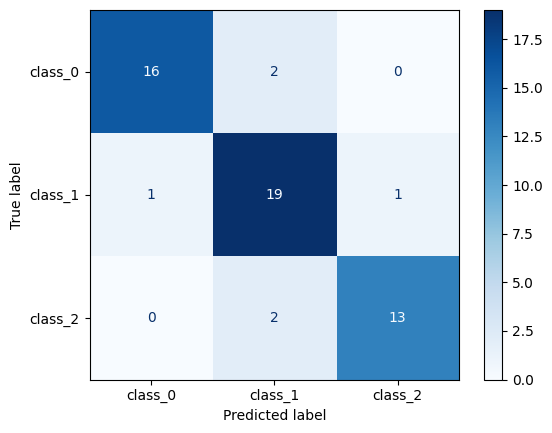

----------------------------------------


In [ ]:
# 5. 성능 평가
# 5.1 정확도
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("-"*40)

# 5.2 분류 보고서
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))
print("-"*40)

# 5.3 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("-"*40)
# 5.4 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=wine.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print("-"*40)

# 추가적인 분석

## 1.상관관계 분석

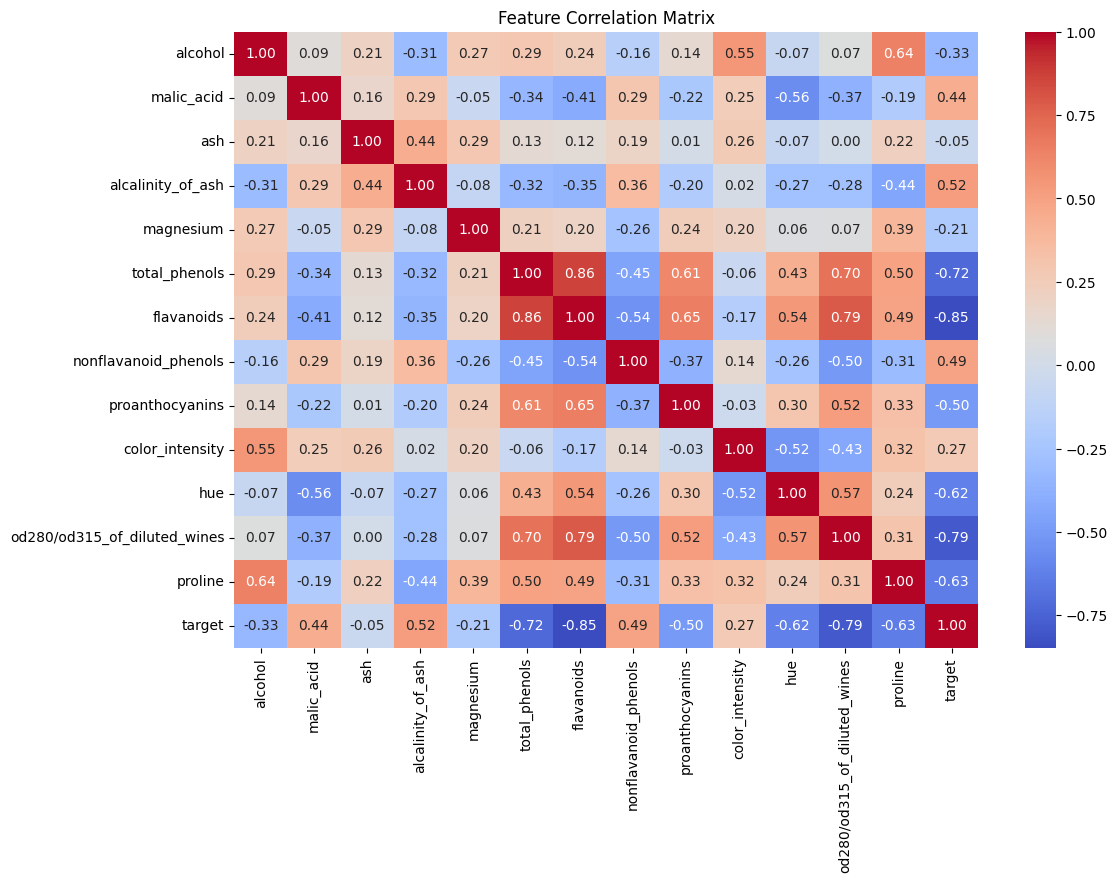

In [ ]:
# 6. 데이터 시각화 (선택적)
# 6.1 특성 간의 상관관계 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

## 2.피처 임포턴스

- 3개의 클래스별 각 피처별 가중치

In [ ]:
model.coef_

array([[-0.02114984,  0.09447906,  0.07527653, -0.40979125, -0.03959505,
         0.15028716,  0.3437837 , -0.03985364,  0.1010476 ,  0.00986465,
         0.00417069,  0.26572262,  0.01319868],
       [ 0.36872013, -0.45869063, -0.07941924,  0.3360857 ,  0.02555053,
         0.2972296 ,  0.37710873,  0.05895394,  0.21017202, -0.91849513,
         0.20831381,  0.37545566, -0.01546948],
       [-0.34757029,  0.36421157,  0.00414271,  0.07370556,  0.01404452,
        -0.44751675, -0.72089242, -0.0191003 , -0.31121962,  0.90863048,
        -0.21248449, -0.64117828,  0.0022708 ]])


Feature Importance:
                         Feature  Importance
9                color_intensity    0.612330
6                     flavanoids    0.480595
11  od280/od315_of_diluted_wines    0.427452
1                     malic_acid    0.305794
5                  total_phenols    0.298345
3              alcalinity_of_ash    0.273194
0                        alcohol    0.245813
8                proanthocyanins    0.207480
10                           hue    0.141656
2                            ash    0.052946
7           nonflavanoid_phenols    0.039303
4                      magnesium    0.026397
12                       proline    0.010313


<ipython-input-45-9a34f6890cb4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


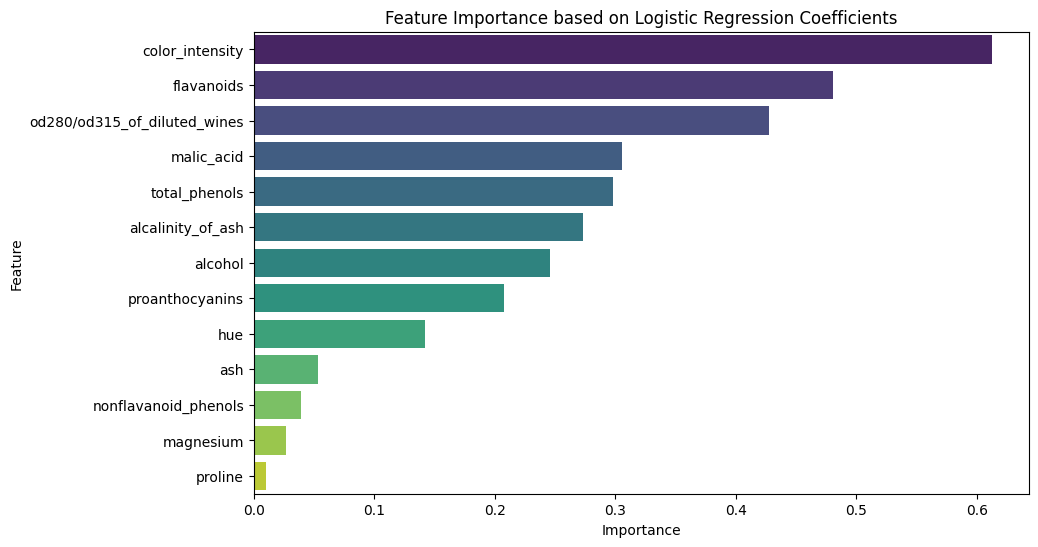

In [ ]:
# 피처 임포턴스 (Feature Importance)
# 로지스틱 회귀에서의 피처 임포턴스는 가중치의 절대값으로 평가
feature_importance = np.abs(model.coef_).mean(axis=0)
feature_names = wine.feature_names

# 피처 중요도를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.show()

## 3.분산 분석 (ANOVA)
- ANOVA(Analysis of Variance)는 두 개 이상의 그룹 간의 평균 차이를 분석하기 위해 사용되는 통계 기법.
- ANOVA는 집단 간의 분산(Variance)을 비교하여 집단 간 평균이 유의미하게 다른지를 검정.

#### F-통계량

- ANOVA는 F-통계량을 사용해 집단 간 분산과 집단 내 분산의 비율을 계산.

- F-통계량이 크면, 그룹 간 차이가 우연에 의해 발생했을 가능성이 낮아짐을 의미.

- F-통계량은 다음과 같이 계산된다.
  
  $$
  F = \frac{\text{집단 간 평균 제곱(MSB)}}{\text{집단 내 평균 제곱(MSW)}}
  $$

- 여기서 MSB는 `Mean Square Between`으로 집단 간 분산을 나타내고, MSW는 `Mean Square Within`으로 집단 내 분산을 나타냄.



In [ ]:
from scipy import stats
# ANOVA 분석을 통한 유의미한 특성 선택
def anova_test(feature):
    categories = [data[feature][data['target'] == label] for label in np.unique(data['target'])]
    f_val, p_val = stats.f_oneway(*categories)
    return f_val, p_val

In [ ]:
# 유의미한 특성 선정 (P-value < 0.01)
selected_features = []
non_selected_features = []
for feature in wine.feature_names:
    f_val, p_val = anova_test(feature)
    if p_val < 0.01:
        selected_features.append((feature, p_val))
    else:
        non_selected_features.append((feature, p_val))

In [ ]:
# 선택된 특성과 선택되지 않은 특성 출력
print("\nSelected Features based on ANOVA (P-value < 0.01):")
for feature, p_val in selected_features:
    print(f"{feature}: P-value = {p_val:.6f}")

print("\nNon-selected Features based on ANOVA (P-value >= 0.01):")
for feature, p_val in non_selected_features:
    print(f"{feature}: P-value = {p_val:.6f}")


Selected Features based on ANOVA (P-value < 0.01):
alcohol: P-value = 0.000000
malic_acid: P-value = 0.000000
ash: P-value = 0.000004
alcalinity_of_ash: P-value = 0.000000
magnesium: P-value = 0.000009
total_phenols: P-value = 0.000000
flavanoids: P-value = 0.000000
nonflavanoid_phenols: P-value = 0.000000
proanthocyanins: P-value = 0.000000
color_intensity: P-value = 0.000000
hue: P-value = 0.000000
od280/od315_of_diluted_wines: P-value = 0.000000
proline: P-value = 0.000000

Non-selected Features based on ANOVA (P-value >= 0.01):


## 4.Lasso를 활용한 피처 셀렉션

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
# Lasso 회귀를 사용한 특성 선택
lasso = LassoCV(cv=5).fit(X, y)

In [ ]:
# 각 피처의 중요도 계산
importance = np.abs(lasso.coef_)
feature_names = wine.feature_names

# 중요도가 0이 아닌 피처 선택
selected_features_lasso = np.array(feature_names)[importance > 0]

print(f"Features selected by Lasso: {selected_features_lasso}")

Features selected by Lasso: ['alcalinity_of_ash' 'flavanoids' 'color_intensity' 'proline']


In [ ]:
# 피처 중요도 데이터프레임 생성
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df.head(n=10)

,Feature,Importance
6,flavanoids,0.228743
9,color_intensity,0.098253
3,alcalinity_of_ash,0.026879
12,proline,0.001303
0,alcohol,0.000000
1,malic_acid,0.000000
2,ash,0.000000
4,magnesium,0.000000
5,total_phenols,0.000000
7,nonflavanoid_phenols,0.000000


<ipython-input-58-90d60bfff04c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


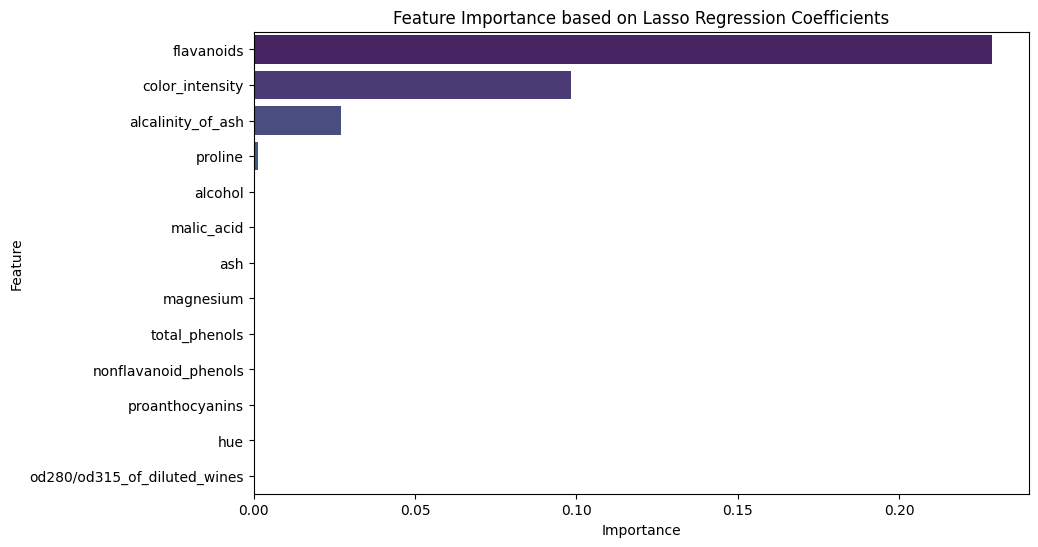

In [ ]:
# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance based on Lasso Regression Coefficients')
plt.show()

In [ ]:
# Lasso로 선택된 피처만 사용하여 로지스틱 회귀 수행
X_selected_lasso = data[selected_features_lasso].values
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_selected_lasso, y, test_size=0.3, random_state=10, stratify=y)


In [ ]:
# 로지스틱 회귀 모델 학습 및 평가
model = LogisticRegression(max_iter=100)
model.fit(X_train_lasso, y_train_lasso)
y_pred_lasso = model.predict(X_test_lasso)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 성능 평가
accuracy_lasso = accuracy_score(y_test_lasso, y_pred_lasso)
print(f"\nAccuracy with Lasso-selected features: {accuracy_lasso:.4f}")


Accuracy with Lasso-selected features: 0.9630
